In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import files and Generate plot data
plotdata_1 = pd.read_csv('data/PPO-LunarLander10000-rewards-train.csv', index_col=0)
plotdata_2 = pd.read_csv('data/PPO-LunarLander1000-rewards-test.csv', index_col=0)
plotdata_3 = pd.read_csv('data/PPO-LunarLander1000-rewards-testFGSM0_1.csv', index_col=0)
plotdata_4 = pd.read_csv('data/PPO-LunarLander1000-rewards-testFGSM0_3.csv', index_col=0)
plotdata_5 = pd.read_csv('data/PPO-LunarLander1000-rewards-testFGSM0_7.csv', index_col=0)
plotdata_6 = pd.read_csv('data/PPO-LunarLander1000-rewards-testFGSM0_9.csv', index_col=0)

n_episodes_train, n_trials_train = plotdata_1.shape
n_episodes_test, n_trials_test = plotdata_2.shape
n_episodes_testFGSM0_1, n_trials_testFGSM0_1 = plotdata_3.shape
n_episodes_testFGSM0_3, n_trials_testFGSM0_3 = plotdata_4.shape
n_episodes_testFGSM0_7, n_trials_testFGSM0_7 = plotdata_5.shape
n_episodes_testFGSM0_9, n_trials_testFGSM0_9 = plotdata_6.shape

train_x = [i+1 for i in range(n_episodes_train)]
test_x = [i+1 for i in range(n_episodes_test)]
testFGSM0_1_x = [i+1 for i in range(n_episodes_testFGSM0_1)]
testFGSM0_3_x = [i+1 for i in range(n_episodes_testFGSM0_3)]
testFGSM0_7_x = [i+1 for i in range(n_episodes_testFGSM0_7)]
testFGSM0_9_x = [i+1 for i in range(n_episodes_testFGSM0_9)]

mean_vals_1 = plotdata_1.mean(axis=1)
std_vals_1 = plotdata_1.std(axis=1)
mean_vals_2 = plotdata_2.mean(axis=1)
std_vals_2 = plotdata_2.std(axis=1)
mean_vals_3 = plotdata_3.mean(axis=1)
std_vals_3 = plotdata_3.std(axis=1)
mean_vals_4 = plotdata_4.mean(axis=1)
std_vals_4 = plotdata_4.std(axis=1)
mean_vals_5 = plotdata_5.mean(axis=1)
std_vals_5 = plotdata_5.std(axis=1)
mean_vals_6 = plotdata_6.mean(axis=1)
std_vals_6 = plotdata_6.std(axis=1)

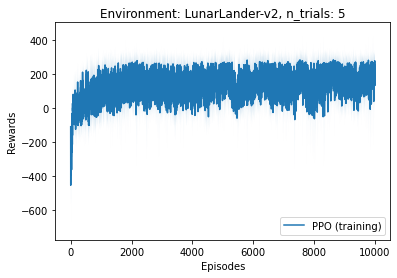

In [3]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel("Episodes")
plt.ylabel("Rewards")

plt.plot(train_x, mean_vals_1, label='PPO (training)')
plt.fill_between(train_x, mean_vals_1-std_vals_1, mean_vals_1+std_vals_1, alpha=0.2)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander10000-train')
plt.show()

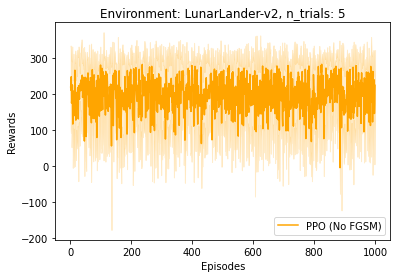

In [4]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel('Episodes')
plt.ylabel('Rewards')

color = 'orange'
plt.plot(test_x, mean_vals_2, label='PPO (No FGSM)', color=color)
plt.fill_between(test_x, mean_vals_2-std_vals_2, mean_vals_2+std_vals_2, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-test')
plt.show()

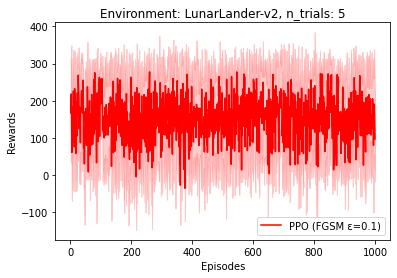

In [5]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel('Episodes')
plt.ylabel('Rewards')

color = 'red'
plt.plot(testFGSM0_1_x, mean_vals_3, label='PPO (FGSM \u03B5=0.1)', color=color)
plt.fill_between(testFGSM0_1_x, mean_vals_3-std_vals_3, mean_vals_3+std_vals_3, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-testFGSM0_1')
plt.show()

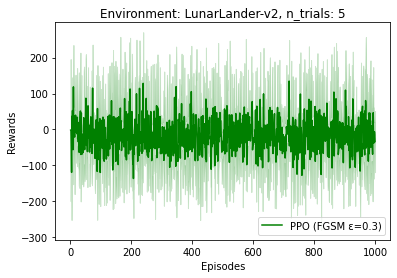

In [6]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel('Episodes')
plt.ylabel('Rewards')

color = 'green'
plt.plot(testFGSM0_3_x, mean_vals_4, label='PPO (FGSM \u03B5=0.3)', color=color)
plt.fill_between(testFGSM0_3_x, mean_vals_4-std_vals_4, mean_vals_4+std_vals_4, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-testFGSM0_3')
plt.show()

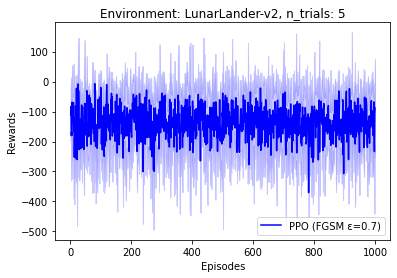

In [7]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel('Episodes')
plt.ylabel('Rewards')

color = 'blue'
plt.plot(testFGSM0_7_x, mean_vals_5, label='PPO (FGSM \u03B5=0.7)', color=color)
plt.fill_between(testFGSM0_7_x, mean_vals_5-std_vals_5, mean_vals_5+std_vals_5, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-testFGSM0_7')
plt.show()

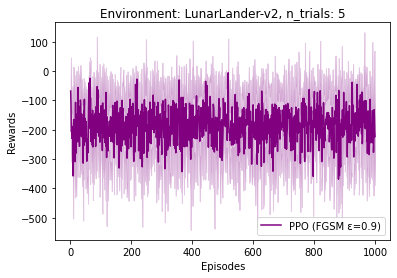

In [8]:
plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5")
plt.xlabel('Episodes')
plt.ylabel('Rewards')

color = 'purple'
plt.plot(testFGSM0_9_x, mean_vals_6, label='PPO (FGSM \u03B5=0.9)', color=color)
plt.fill_between(testFGSM0_9_x, mean_vals_6-std_vals_6, mean_vals_6+std_vals_6, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-testFGSM0_9')
plt.show()

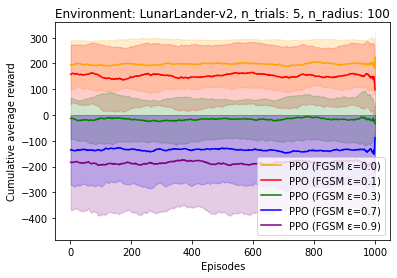

In [9]:
def smoothing(arr, radius=10):
    y = []
    for i in range(len(arr)):
        y.append(np.mean(arr[i:radius+i]))
    return np.array(y)

radius = 100
y_2 = smoothing(mean_vals_2, radius)
y_2_var = smoothing(std_vals_2, radius)
y_3 = smoothing(mean_vals_3, radius)
y_3_var = smoothing(std_vals_3, radius)
y_4 = smoothing(mean_vals_4, radius)
y_4_var = smoothing(std_vals_4, radius)
y_5 = smoothing(mean_vals_5, radius)
y_5_var = smoothing(mean_vals_5, radius)
y_6 = smoothing(mean_vals_6, radius)
y_6_var = smoothing(mean_vals_6, radius)

plt.figure()

plt.title("Environment: LunarLander-v2, n_trials: 5, n_radius: {}".format(radius))
plt.xlabel("Episodes")
plt.ylabel("Cumulative average reward")

color = "orange"
plt.plot(test_x, y_2, label='PPO (FGSM \u03B5=0.0)', color=color)
plt.fill_between(test_x, y_2-y_2_var, y_2+y_2_var, alpha=0.2, color=color)

color = "red"
plt.plot(testFGSM0_1_x, y_3, label='PPO (FGSM \u03B5=0.1)', color=color)
plt.fill_between(testFGSM0_1_x, y_3-y_3_var, y_3+y_3_var, alpha=0.2, color=color)

color = "green"
plt.plot(testFGSM0_3_x, y_4, label='PPO (FGSM \u03B5=0.3)', color=color)
plt.fill_between(testFGSM0_3_x, y_4-y_4_var, y_4+y_4_var, alpha=0.2, color=color)

color = "blue"
plt.plot(testFGSM0_7_x, y_5, label='PPO (FGSM \u03B5=0.7)', color=color)
plt.fill_between(testFGSM0_7_x, y_5-y_5_var, y_5+y_5_var, alpha=0.2, color=color)

color = "purple"
plt.plot(testFGSM0_9_x, y_6, label='PPO (FGSM \u03B5=0.9)', color=color)
plt.fill_between(testFGSM0_9_x, y_6-y_6_var, y_6+y_6_var, alpha=0.2, color=color)

plt.legend(loc='lower right')

plt.savefig('plots/LunarLander1000-testFGSM_Combined')
plt.show()

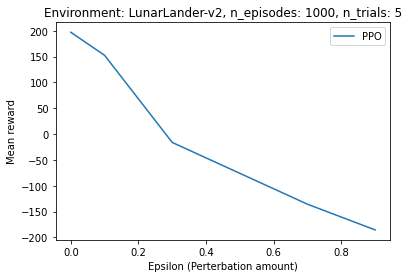

In [10]:
y_2 = mean_vals_2.mean()
y_3 = mean_vals_3.mean()
y_4 = mean_vals_4.mean()
y_5 = mean_vals_5.mean()
y_6 = mean_vals_6.mean()

plt.figure()
plt.title("Environment: LunarLander-v2, n_episodes: 1000, n_trials: 5")
plt.xlabel("Epsilon (Perterbation amount)")
plt.ylabel("Mean reward")

epsilon = [0.0, 0.1, 0.3, 0.7, 0.9]
mean_reward = [y_2, y_3, y_4, y_5, y_6]

plt.plot(epsilon, mean_reward, label='PPO')
plt.legend(loc='upper right')

plt.savefig('plots/LunarLander1000-epsilonVSMeanReward')
plt.show()